In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


from tensorflow.python.summary.summary_iterator import summary_iterator

In [32]:
import os

def get_section_results(file, keys=['Eval_AverageReturn']):
    if os.path.isdir(file):
        file = os.path.join(file, os.listdir(file)[0])
    print(file)
    eval_returns_dict = {}
    for k in keys:
        eval_returns_dict[k] = []
    for e in summary_iterator(file):
        for v in e.summary.value:
            if v.tag in keys:
                eval_returns_dict[v.tag].append(v.simple_value)
    for k in keys:
        eval_returns_dict[k] = np.array(eval_returns_dict[k])
    return eval_returns_dict

In [13]:
q1_lb_files = {"data_hw2/q1_lb_no_rtg_dsa_CartPole-v0_02-10-2020_01-56-47/events.out.tfevents.1601603808.716cffaa401a": "no_rtg_dsa", 
               "data_hw2/q1_lb_rtg_dsa_CartPole-v0_02-10-2020_01-53-05/events.out.tfevents.1601603586.716cffaa401a": "rtg_dsa", 
               "data_hw2/q1_lb_rtg_na_CartPole-v0_02-10-2020_01-49-01/events.out.tfevents.1601603342.716cffaa401a": "rtg_na"}

q1_sb_files = {"data_hw2/q1_lb_no_rtg_dsa_5000_CartPole-v0_26-09-2020_18-36-15/events.out.tfevents.1601170575.heisenberg": "no_rtg_dsa", 
               "data_hw2/q1_sb_rtg_dsa_CartPole-v0_02-10-2020_01-46-09/events.out.tfevents.1601603170.716cffaa401a": "rtg_dsa",
               "data_hw2/q1_lb_rtg_na_5000_CartPole-v0_26-09-2020_18-36-08/events.out.tfevents.1601170568.heisenberg": "rtg_na"}

In [16]:
def plot_q5(files_label_dict, title):
    for f in files_label_dict.keys():
        returns_dict = get_section_results(f, keys=['Eval_AverageReturn', 'Eval_StdReturn'])
        eval_returns, stds = returns_dict['Eval_AverageReturn'], returns_dict['Eval_StdReturn']
        plt.plot(range(len(eval_returns)), eval_returns, label=files_label_dict[f])
    
    plt.xlabel("Training Steps")
    plt.ylabel("Eval_AverageReturn")
    plt.title(title)
    plt.legend()
    
    plt.show()
    

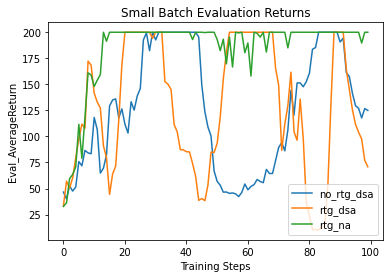

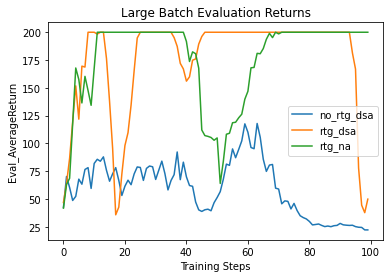

In [17]:
plot_q5(q1_sb_files, title="Small Batch Evaluation Returns")
plot_q5(q1_lb_files, title="Large Batch Evaluation Returns")

In [18]:
q2_files = {
    "data_hw2/q2_b1000_r0.01_InvertedPendulum-v2_02-10-2020_01-22-45/events.out.tfevents.1601601767.629f4499b00d": "b1000_r0.01",
    "data_hw2/q2_b1000_r0.001_InvertedPendulum-v2_02-10-2020_01-24-35/events.out.tfevents.1601601876.629f4499b00d": "b1000_r0.001",
    "data_hw2/q2_b100_r0.01_InvertedPendulum-v2_02-10-2020_01-41-56/events.out.tfevents.1601602916.716cffaa401a": "b100_r0.01"
}

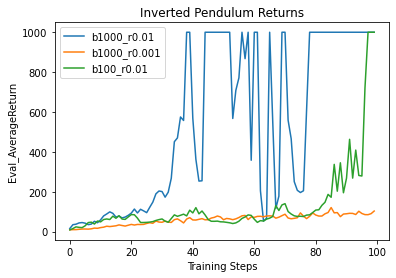

In [19]:
plot_q5(q2_files, title="Inverted Pendulum Returns")

## Answer to 5:
1. The one with reward-to-go seem to converge faster, though in the end they converge to the same result
2. Advantage standardization doesn't seem to have a significant impact, standardization sometimes seem to hinder the convergence
3. Yes, batch size make the training converges faster

In [ ]:
def get_comparison_b_lr(data_dir="5_2_data", batch_idx=1, lr_idx=2):
    import os
    all_logs = {}
    group_size = 5
    for root, dirs, files in os.walk(data_dir):
        if len(dirs) > 1:
            for d in sorted(dirs):
#                 print("*********** ", d)
                d_tokens = d.split("_")
                exp_name=d_tokens[batch_idx] + "_" + d_tokens[lr_idx]
                for r, dd, f in os.walk(os.path.join(data_dir, d)):
                    all_logs[os.path.join(r, f[0])] = exp_name
    return all_logs

def plot_comparison(all_logs, group_size):
    all_files = list(all_logs.keys()) 
    num_logs_graphed = 0
    group_idx = 0
    while num_logs_graphed < len(all_files):
        mini_logs = {}
        for f in all_files[num_logs_graphed: num_logs_graphed + group_size]:
            mini_logs[f] = all_logs[f]
        plot_q5(mini_logs, title="Group " + str(group_idx))
        group_idx += 1
        num_logs_graphed += group_size
    
plot_comparison(get_comparison_b_lr(), group_size=5)

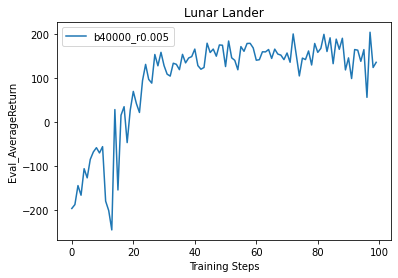

In [21]:
lunar_logs={"data_hw2/q3_b40000_r0.005_LunarLanderContinuous-v2_01-10-2020_23-26-06/events.out.tfevents.1601594767.629f4499b00d": "b40000_r0.005"}
plot_q5(lunar_logs, title="Lunar Lander")

data_hw2/q4_search_b10000_r0.005_rtg_nnbaseline_HalfCheetah-v2_01-10-2020_23-02-05\events.out.tfevents.1601593326.629f4499b00d
data_hw2/q4_search_b10000_r0.01_rtg_nnbaseline_HalfCheetah-v2_01-10-2020_17-14-01\events.out.tfevents.1601572441.629f4499b00d
data_hw2/q4_search_b10000_r0.02_rtg_nnbaseline_HalfCheetah-v2_01-10-2020_22-42-43\events.out.tfevents.1601592163.629f4499b00d
data_hw2/q4_search_b30000_r0.01_rtg_nnbaseline_HalfCheetah-v2_01-10-2020_17-29-52\events.out.tfevents.1601573393.629f4499b00d
data_hw2/q4_search_b50000_r0.005_HalfCheetah-v2_01-10-2020_20-22-45\events.out.tfevents.1601583766.629f4499b00d
data_hw2/q4_search_b50000_r0.01_rtg_nnbaseline_HalfCheetah-v2_01-10-2020_18-29-49\events.out.tfevents.1601576989.629f4499b00d
data_hw2/q4_search_b50000_r0.02_HalfCheetah-v2_01-10-2020_20-18-46\events.out.tfevents.1601583528.629f4499b00d


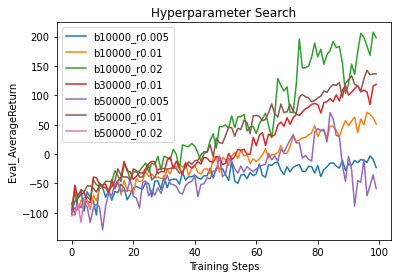

In [35]:
search_logs = {
    "data_hw2/q4_search_b10000_r0.005_rtg_nnbaseline_HalfCheetah-v2_01-10-2020_23-02-05": "b10000_r0.005",
    "data_hw2/q4_search_b10000_r0.01_rtg_nnbaseline_HalfCheetah-v2_01-10-2020_17-14-01": "b10000_r0.01", 
    "data_hw2/q4_search_b10000_r0.02_rtg_nnbaseline_HalfCheetah-v2_01-10-2020_22-42-43": "b10000_r0.02",
#     "data_hw2/q4_search_b30000_r0.005_rtg_nnbaseline_HalfCheetah-v2_01-10-2020_15-43-11": "b30000_r0.005",
    "data_hw2/q4_search_b30000_r0.01_rtg_nnbaseline_HalfCheetah-v2_01-10-2020_17-29-52": "b30000_r0.01",
#     "data_hw2/q4_search_b30000_r0.005_rtg_nnbaseline_HalfCheetah-v2_01-10-2020_15-43-11": "b30000_r0.02",
    "data_hw2/q4_search_b50000_r0.005_HalfCheetah-v2_01-10-2020_20-22-45": "b50000_r0.005",
    "data_hw2/q4_search_b50000_r0.01_rtg_nnbaseline_HalfCheetah-v2_01-10-2020_18-29-49": "b50000_r0.01",
    "data_hw2/q4_search_b50000_r0.02_HalfCheetah-v2_01-10-2020_20-18-46": "b50000_r0.02"
}

plot_q5(search_logs, title="Hyperparameter Search")

In [27]:
import os
os.listdir("data_hw2/q4_search_b10000_r0.005_rtg_nnbaseline_HalfCheetah-v2_01-10-2020_23-02-05")

['events.out.tfevents.1601593326.629f4499b00d']

In [ ]:
plot_comparison(get_comparison_b_lr(data_dir="HalfCheetahData", batch_idx=4, lr_idx=5), group_size=3)

data_hw2/q4_b50000_r0.02_HalfCheetah-v2_01-10-2020_20-22-45\events.out.tfevents.1601583766.629f4499b00d
data_hw2/q4_b50000_r0.02_nnbaseline_HalfCheetah-v2_01-10-2020_21-43-14\events.out.tfevents.1601588595.629f4499b00d
data_hw2/q4_b50000_r0.02_rtg_HalfCheetah-v2_01-10-2020_20-51-09\events.out.tfevents.1601585470.629f4499b00d
data_hw2/q4_b50000_r0.02_rtg_nnbaseline_HalfCheetah-v2_01-10-2020_19-24-11\events.out.tfevents.1601580252.629f4499b00d


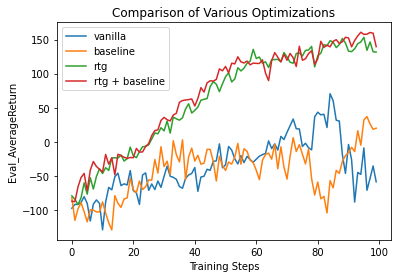

In [36]:
final_logs = {
    "data_hw2/q4_b50000_r0.02_HalfCheetah-v2_01-10-2020_20-22-45": "vanilla", 
    "data_hw2/q4_b50000_r0.02_nnbaseline_HalfCheetah-v2_01-10-2020_21-43-14": "baseline", 
    "data_hw2/q4_b50000_r0.02_rtg_HalfCheetah-v2_01-10-2020_20-51-09": "rtg", 
    "data_hw2/q4_b50000_r0.02_rtg_nnbaseline_HalfCheetah-v2_01-10-2020_19-24-11": "rtg + baseline"}

plot_q5(final_logs, title="Comparison of Various Optimizations")